<a href="https://colab.research.google.com/github/akshayugalmogale/Sports-Data-Analysis-Winning-Team-Prediction-Using-Machine-Learning/blob/main/Match_Win_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports & Load dataset:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [4]:
ipl_df = pd.read_csv('/content/ipl_ball_by_ball_data.csv')

## Sneak peak into the data: 

In [5]:
ipl_df.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.4,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [6]:
ipl_df.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Che'], dtype=object)

In [7]:
ipl_df.innings.unique()

array([1, 2, 4, 3])

In [8]:
ipl_df = ipl_df[(ipl_df.innings == 1) | (ipl_df.innings == 2)]

In [9]:
ipl_df.innings.unique()

array([1, 2])

## Additional Colums:

In [10]:
# 1. total runs in each ball
# 2. is there a wicket fall in that ball

In [11]:
ipl_df['total_runs'] = ipl_df.apply(lambda x: x['runs_off_bat'] + x['extras'], axis = 1)

In [12]:
# ipl_df.head(20)

In [13]:
type(ipl_df.player_dismissed[11])

str

In [14]:
ipl_df['isOut'] = ipl_df['player_dismissed'].apply(lambda x: 1 if type(x) == type('str') else 0)

In [15]:
# ipl_df.head(15)

## Choose Teams:

In [16]:
# t1 - bat first, t2 - bat second
# Ex: MI vs RCB, (match_id: 1254058) 

t1 = 'Mumbai Indians'
t2 = 'Royal Challengers Bangalore'

## Choose a Match b/w these Teams:

In [17]:
ipl_df[(ipl_df.batting_team == t1) & (ipl_df.bowling_team == t2) & (ipl_df.innings == 1)].match_id.unique()

array([335985, 392208, 392218, 419119, 419157, 419162])

In [18]:
matchID = 1254058

In [19]:
mdf = ipl_df[ipl_df.match_id == matchID]

In [20]:
# mdf.head()

In [21]:
mdf.reset_index(inplace = True, drop = True)

In [22]:
# mdf.head()

In [23]:
df1 = mdf[mdf.innings == 1] 
df2 = mdf[mdf.innings == 2] 

## Outcomes:

In [24]:
# 0, 1, 2, 3, 4, 5, 6, 7, 'W', 'extras'
outcomes = [0, 1, 2, 3, 4, 6, 'w']

In [25]:
ipl_df[ipl_df.batting_team == t1].total_runs.value_counts()

1.0    2638
0.0    2273
4.0    753 
2.0    441 
6.0    243 
3.0    30  
5.0    19  
7.0    2   
Name: total_runs, dtype: int64

In [26]:
ipl_df[ipl_df.batting_team == t1].isOut.sum()

304

In [27]:
t1_outcomes_count = ipl_df[ipl_df.batting_team == t1].total_runs.value_counts()
t2_outcomes_count = ipl_df[ipl_df.batting_team == t2].total_runs.value_counts()

In [28]:
t1_outs = ipl_df[ipl_df.batting_team == t1].isOut.sum()
t2_outs = ipl_df[ipl_df.batting_team == t2].isOut.sum()

In [29]:
t1_outcomes = []
t2_outcomes = []

for outcome in outcomes:
    if outcome != 'w':
        t1_outcomes.append(t1_outcomes_count[outcome])
        t2_outcomes.append(t2_outcomes_count[outcome])
    else:
        t1_outcomes.append(t1_outs)
        t2_outcomes.append(t2_outs)

In [30]:
t1_outcomes, t2_outcomes

([2273, 2638, 441, 30, 753, 243, 304], [2382, 2642, 411, 19, 740, 258, 342])

In [31]:
t1_pb_outcomes = [i/sum(t1_outcomes) for i in t1_outcomes]
t2_pb_outcomes = [i/sum(t2_outcomes) for i in t2_outcomes]

In [32]:
t1_pb_outcomes

[0.34016761448668065,
 0.394791978449566,
 0.06599820413049985,
 0.004489673750374139,
 0.1126908111343909,
 0.03636635737803053,
 0.045495360670457945]

In [33]:
# (0 --> 1)
# ex: 
# dot - 34%
# ones - 34% + 39% = 73%

In [34]:
t1_pb_ls = np.cumsum(t1_pb_outcomes)
t2_pb_ls = np.cumsum(t2_pb_outcomes)

In [35]:
t1_pb_ls, t2_pb_ls

(array([0.34016761, 0.73495959, 0.8009578 , 0.80544747, 0.91813828,
        0.95450464, 1.        ]),
 array([0.35060347, 0.73947601, 0.79997056, 0.80276715, 0.91168678,
        0.94966147, 1.        ]))

In [36]:
np.random.random()

0.004788824924226498

In [37]:
# run it for 120 balls & determine runs

pred_runs = 0
pred_wks = 0
balls = 120

i1p_0 = t1_pb_ls[0]
i1p_1 = t1_pb_ls[1]
i1p_2 = t1_pb_ls[2]
i1p_3 = t1_pb_ls[3]
i1p_4 = t1_pb_ls[4]
i1p_6 = t1_pb_ls[5]
i1p_w = t1_pb_ls[6]

i2p_0 = t2_pb_ls[0]
i2p_1 = t2_pb_ls[1]
i2p_2 = t2_pb_ls[2]
i2p_3 = t2_pb_ls[3]
i2p_4 = t2_pb_ls[4]
i2p_6 = t2_pb_ls[5]
i2p_w = t2_pb_ls[6]

for i in range(balls):
    r_value = np.random.random()
    
    if r_value <= i1p_0:
        pred_runs += 0
    elif r_value <= i1p_1:
        pred_runs += 1
    elif r_value <= i1p_2:
        pred_runs += 2
    elif r_value <= i1p_3:
        pred_runs += 3
    elif r_value <= i1p_4:
        pred_runs += 4
    elif r_value <= i1p_6:
        pred_runs += 6
    else:
        pred_runs += 0
        pred_wks += 1   
        
        if pred_wks == 10:
            break

In [38]:
pred_runs, pred_wks

(141, 8)

In [39]:
# 100/1 after 10 overs, runs prediction?

In [40]:
ipl_df.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,0
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.4,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,0


In [41]:
over_ball = 19.5

over_no = int(str(over_ball).split('.')[0])
ball_no = int(str(over_ball).split('.')[1])

print(over_no*6 + ball_no)

119


## Function: 1st Innings runs prediction 

In [42]:
def innings_1_runs(curr_score, curr_wickets, curr_overs):
    # initialize
    pred_runs = curr_score
    pred_wks = curr_wickets
    over_ball = curr_overs

    over_no = int(str(over_ball).split('.')[0])
    ball_no = int(str(over_ball).split('.')[1])

    leftover_balls = 120 - (over_no*6 + ball_no)

    i1p_0 = t1_pb_ls[0]
    i1p_1 = t1_pb_ls[1]
    i1p_2 = t1_pb_ls[2]
    i1p_3 = t1_pb_ls[3]
    i1p_4 = t1_pb_ls[4]
    i1p_6 = t1_pb_ls[5]
    i1p_w = t1_pb_ls[6]

    i2p_0 = t2_pb_ls[0]
    i2p_1 = t2_pb_ls[1]
    i2p_2 = t2_pb_ls[2]
    i2p_3 = t2_pb_ls[3]
    i2p_4 = t2_pb_ls[4]
    i2p_6 = t2_pb_ls[5]
    i2p_w = t2_pb_ls[6]

    for i in range(leftover_balls):
        r_value = np.random.random()

        if r_value <= i1p_0:
            pred_runs += 0
        elif r_value <= i1p_1:
            pred_runs += 1
        elif r_value <= i1p_2:
            pred_runs += 2
        elif r_value <= i1p_3:
            pred_runs += 3
        elif r_value <= i1p_4:
            pred_runs += 4
        elif r_value <= i1p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1   

            if pred_wks == 10:
                break
                
    return pred_runs

In [43]:
# innings_1_runs(curr_score, curr_wickets, curr_overs)
innings_1_runs(140, 9, 15.0)

149

## Function: 2nd Innings runs prediction 

In [44]:
def innings_2_runs(curr_score, curr_wickets, curr_overs, target):
    # initialize
    pred_runs = curr_score
    pred_wks = curr_wickets
    over_ball = curr_overs

    over_no = int(str(over_ball).split('.')[0])
    ball_no = int(str(over_ball).split('.')[1])

    leftover_balls = 120 - (over_no*6 + ball_no)

    i2p_0 = t2_pb_ls[0]
    i2p_1 = t2_pb_ls[1]
    i2p_2 = t2_pb_ls[2]
    i2p_3 = t2_pb_ls[3]
    i2p_4 = t2_pb_ls[4]
    i2p_6 = t2_pb_ls[5]
    i2p_w = t2_pb_ls[6]

    for i in range(leftover_balls):
        r_value = np.random.random()

        if r_value <= i2p_0:
            pred_runs += 0
        elif r_value <= i2p_1:
            pred_runs += 1
        elif r_value <= i2p_2:
            pred_runs += 2
        elif r_value <= i2p_3:
            pred_runs += 3
        elif r_value <= i2p_4:
            pred_runs += 4
        elif r_value <= i2p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1   

            if pred_wks == 10:
                break
        if pred_runs > target:
            break
                
    return pred_runs

In [45]:
# innings_2_runs(curr_score, curr_wickets, curr_overs, target)
innings_2_runs(140, 4, 19.0, 150)

144

In [46]:
df_ing1 = mdf[mdf.innings == 1] 
df_ing2 = mdf[mdf.innings == 2] 

In [47]:
df_ing2.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut


In [48]:
df_ing1 = df_ing1.sort_values('ball', ascending = True)
df_ing2 = df_ing2.sort_values('ball', ascending = True)

In [49]:
df_ing1.reset_index(inplace = True, drop = True)
df_ing2.reset_index(inplace = True, drop = True)

## Runs prediction: 1st Innings

In [50]:
curr_score = 0
curr_wickets = 0
curr_overs = 0.0

ing1_runs_pred = []

for i in range(len(df_ing1)):
    curr_score += df_ing1.total_runs[i]
    curr_wickets += df_ing1.isOut[i]
    curr_overs = df_ing1.ball[i]
    
    prediction = innings_1_runs(curr_score, curr_wickets, curr_overs)
    ing1_runs_pred.append(prediction)

In [51]:
# ing1_runs_pred

In [52]:
sum(df_ing1.total_runs)

0

In [53]:
actual_score = sum(df_ing1.total_runs)

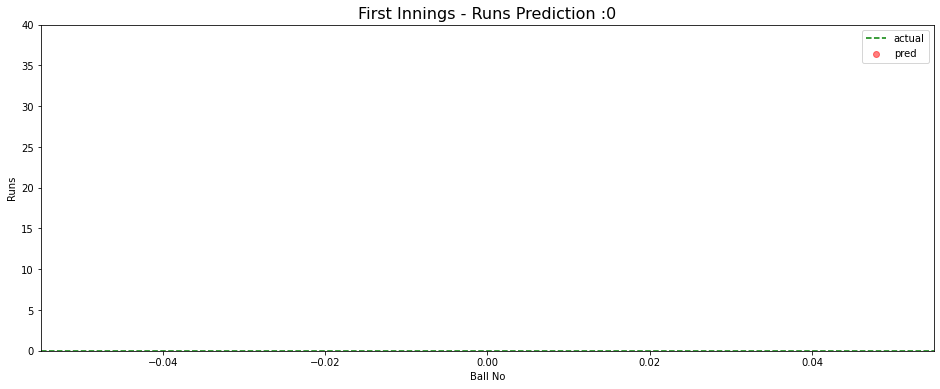

In [54]:
x_values = [i for i in range(len(df_ing1))]
y_values = ing1_runs_pred

plt.figure(figsize = (16, 6))
plt.scatter(x_values, y_values, color = 'r', alpha = 0.5, label = 'pred')
plt.axhline(actual_score, ls = '--', color = 'g', label = 'actual')
plt.ylim(0, actual_score + 40 )
plt.title('First Innings - Runs Prediction :'+ str(actual_score), fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.legend()
plt.show()

In [55]:
error_ing1_ls = [abs(i - actual_score) for i in ing1_runs_pred]

In [56]:
np.mean(error_ing1_ls)

nan

## Runs prediction: 2nd Innings

In [57]:
# define target as ing 1 actual score
ing1_actual_score = actual_score 
target = ing1_actual_score

curr_score = 0
curr_wickets = 0
curr_overs = 0.0

ing2_runs_pred = []

for i in range(len(df_ing2)):
    curr_score += df_ing2.total_runs[i]
    curr_overs = df_ing2.ball[i]
    curr_wickets += df_ing2.isOut[i]
    
    prediction = innings_2_runs(curr_score, curr_wickets, curr_overs, target)
#     print('target: ', target)
#     print('score: ', curr_score, ' overs: ', curr_overs, ' wickets: ', curr_wickets, ' prediction: ', prediction)
    ing2_runs_pred.append(prediction)

In [58]:
ing2_actual_score = sum(df_ing2.total_runs)

## Runs prediction chart: 2nd Innings

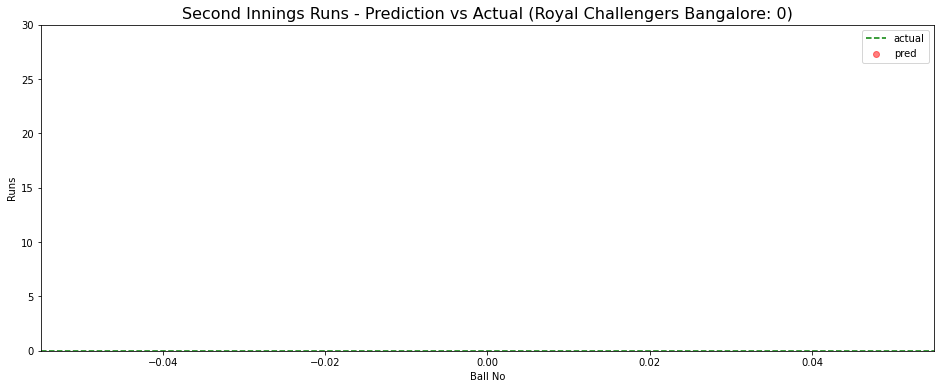

In [59]:
plt.figure(figsize = (16, 6))
plt.scatter([i for i in range(len(ing2_runs_pred))], ing2_runs_pred, alpha = 0.5, label = 'pred', color = 'red')
plt.ylim(0, ing2_actual_score + 30)
plt.axhline(ing2_actual_score, ls = '--', label = 'actual', color = 'green')
plt.title('Second Innings Runs - Prediction vs Actual (' + t2 + ': ' + str(ing2_actual_score) +  ')', fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.legend()
plt.show()

### Error in 2nd Innings runs:

In [60]:
np.mean([abs(i - ing2_actual_score) for i in ing2_runs_pred])

nan

## Win predictions: 1st Innings

In [61]:
# initialize win/tie/lose - w.r.t chasing team
win_count = 0
tie_count = 0
lose_count = 0

win_count_ls = []
tie_count_ls = []
lose_count_ls = []

ing1_curr_score = 0
ing1_curr_overs = 0
ing1_curr_wickets = 0

# each ball
for i in range(len(df_ing1)):
    
    # 1st innings values
    ing1_curr_score += df_ing1.total_runs[i]
    ing1_curr_overs = df_ing1.ball[i]
    ing1_curr_wickets += df_ing1.isOut[i]
    
    #2nd innings values
    ing2_curr_score = 0
    ing2_curr_wickets = 0
    ing2_curr_overs = 0.0
    
    # 100 iterations: (ex: 43% wins, 17% tie, 40% lose)
    for j in range(100):   
        ing1_runs_prediction = innings_1_runs(ing1_curr_score, ing1_curr_wickets, ing1_curr_overs)
        target = ing1_runs_prediction
        
        ing2_runs_prediction = innings_2_runs(ing2_curr_score, ing2_curr_wickets, ing2_curr_overs, target)
        
        if ing2_runs_prediction > target:
            win_count += 1
        elif ing2_runs_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0

In [62]:
# tie_count_ls

## Win predictions: 2nd Innings

In [63]:
#2nd innings values
ing2_curr_score = 0
ing2_curr_wickets = 0
ing2_curr_overs = 0.0
target = ing1_actual_score

# each ball
for i in range(len(df_ing2)):
    
    #2nd innings values
    ing2_curr_score += df_ing2.total_runs[i]
    ing2_curr_wickets += df_ing2.isOut[i]
    ing2_curr_overs = df_ing2.ball[i]
    
    # 100 iterations: (ex: 43% wins, 17% tie, 40% lose)
    for j in range(100):   
                
        ing2_runs_prediction = innings_2_runs(ing2_curr_score, ing2_curr_wickets, ing2_curr_overs, target)
        
        if ing2_runs_prediction > target:
            win_count += 1
        elif ing2_runs_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0

In [64]:
len(win_count_ls), len(tie_count_ls), len(lose_count_ls)

(0, 0, 0)

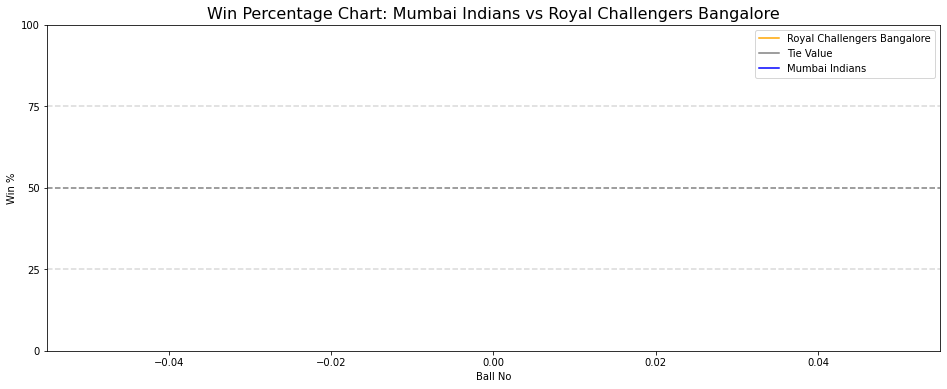

In [65]:
plt.figure(figsize = (16, 6))

x1_values = [i for i in range(len(win_count_ls))]
y1_values = win_count_ls

x2_values = [i for i in range(len(tie_count_ls))]
y2_values = tie_count_ls

x3_values = [i for i in range(len(lose_count_ls))]
y3_values = lose_count_ls

for i in range(10, len(mdf), 20):
    if i < len(mdf) - 10:
        plt.axvspan(i, i+10, ymin = 0, ymax = 100, alpha = 0.05, color='grey')
        
plt.axhline(y = 75, ls = '--', alpha = 0.3, c = 'grey')
plt.axhline(y = 50, ls = '--', alpha = 1, c = 'grey')
plt.axhline(y = 25, ls = '--', alpha = 0.3, c = 'grey')

plt.plot(x1_values, y1_values, color = 'orange', label = t2)
plt.plot(x2_values, y2_values, color = 'grey', label = 'Tie Value')
plt.plot(x3_values, y3_values, color = 'blue', label = t1)

plt.ylim(0, 100)
plt.yticks([0, 25, 50, 75, 100])


# add confidence interval
# ci = 3
# plt.fill_between(x1_values, np.array(y1_values) - ci, np.array(y1_values) + ci, color = 'orange', alpha = 0.2 )
# plt.fill_between(x2_values, np.array(y2_values) - ci, np.array(y2_values) + ci, color = 'grey', alpha = 0.2 )
# plt.fill_between(x3_values, np.array(y3_values) - ci, np.array(y3_values) + ci, color = 'blue', alpha = 0.2 )

plt.title('Win Percentage Chart: ' + t1 + ' vs ' + t2, fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Win %')
plt.legend()
plt.show()